In [1]:
import torch
import torchvision 
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

In [2]:
dataset = MNIST(root='./data', download=True, transform = transforms.ToTensor())

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='./data', train = False)

In [5]:
len(test_dataset)

10000

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# image, label = dataset[0]
# plt.imshow(image, cmap = 'gray')
# print("Label:", label)

In [8]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [9]:
train_ds.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [11]:
import torch.nn as nn
import torch.nn.functional as F

In [12]:
input_size = 28*28
num_classes = 10


In [13]:
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, input_size)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss':loss, 'val_acc':acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
        

In [14]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    opt = opt_func(model.parameters(), lr)
    history = []

    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            opt.step()
            opt.zero_grad()

        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [15]:
model = MNISTModel()

In [16]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.335764169692993, 'val_acc': 0.10799050331115723}

In [17]:
EPOCHS = 200
history = fit(EPOCHS, 1e-3, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9578, val_acc: 0.6275
Epoch [1], val_loss: 1.6803, val_acc: 0.7381
Epoch [2], val_loss: 1.4742, val_acc: 0.7753
Epoch [3], val_loss: 1.3192, val_acc: 0.7947
Epoch [4], val_loss: 1.2004, val_acc: 0.8098
Epoch [5], val_loss: 1.1072, val_acc: 0.8179
Epoch [6], val_loss: 1.0325, val_acc: 0.8238
Epoch [7], val_loss: 0.9716, val_acc: 0.8295
Epoch [8], val_loss: 0.9209, val_acc: 0.8345
Epoch [9], val_loss: 0.8781, val_acc: 0.8371
Epoch [10], val_loss: 0.8415, val_acc: 0.8404
Epoch [11], val_loss: 0.8098, val_acc: 0.8439
Epoch [12], val_loss: 0.7821, val_acc: 0.8461
Epoch [13], val_loss: 0.7576, val_acc: 0.8492
Epoch [14], val_loss: 0.7359, val_acc: 0.8515
Epoch [15], val_loss: 0.7164, val_acc: 0.8529
Epoch [16], val_loss: 0.6989, val_acc: 0.8546
Epoch [17], val_loss: 0.6829, val_acc: 0.8561
Epoch [18], val_loss: 0.6684, val_acc: 0.8574
Epoch [19], val_loss: 0.6550, val_acc: 0.8592
Epoch [20], val_loss: 0.6428, val_acc: 0.8604
Epoch [21], val_loss: 0.6315, val_acc: 0.861

Epoch [177], val_loss: 0.3581, val_acc: 0.8992
Epoch [178], val_loss: 0.3577, val_acc: 0.8993
Epoch [179], val_loss: 0.3574, val_acc: 0.8993
Epoch [180], val_loss: 0.3570, val_acc: 0.8995
Epoch [181], val_loss: 0.3567, val_acc: 0.8996
Epoch [182], val_loss: 0.3563, val_acc: 0.8997
Epoch [183], val_loss: 0.3560, val_acc: 0.8998
Epoch [184], val_loss: 0.3556, val_acc: 0.8999
Epoch [185], val_loss: 0.3553, val_acc: 0.9002
Epoch [186], val_loss: 0.3549, val_acc: 0.9003
Epoch [187], val_loss: 0.3546, val_acc: 0.9004
Epoch [188], val_loss: 0.3542, val_acc: 0.9004
Epoch [189], val_loss: 0.3539, val_acc: 0.9008
Epoch [190], val_loss: 0.3536, val_acc: 0.9007
Epoch [191], val_loss: 0.3532, val_acc: 0.9007
Epoch [192], val_loss: 0.3529, val_acc: 0.9012
Epoch [193], val_loss: 0.3526, val_acc: 0.9011
Epoch [194], val_loss: 0.3523, val_acc: 0.9014
Epoch [195], val_loss: 0.3520, val_acc: 0.9015
Epoch [196], val_loss: 0.3516, val_acc: 0.9015
Epoch [197], val_loss: 0.3513, val_acc: 0.9019
Epoch [198], 

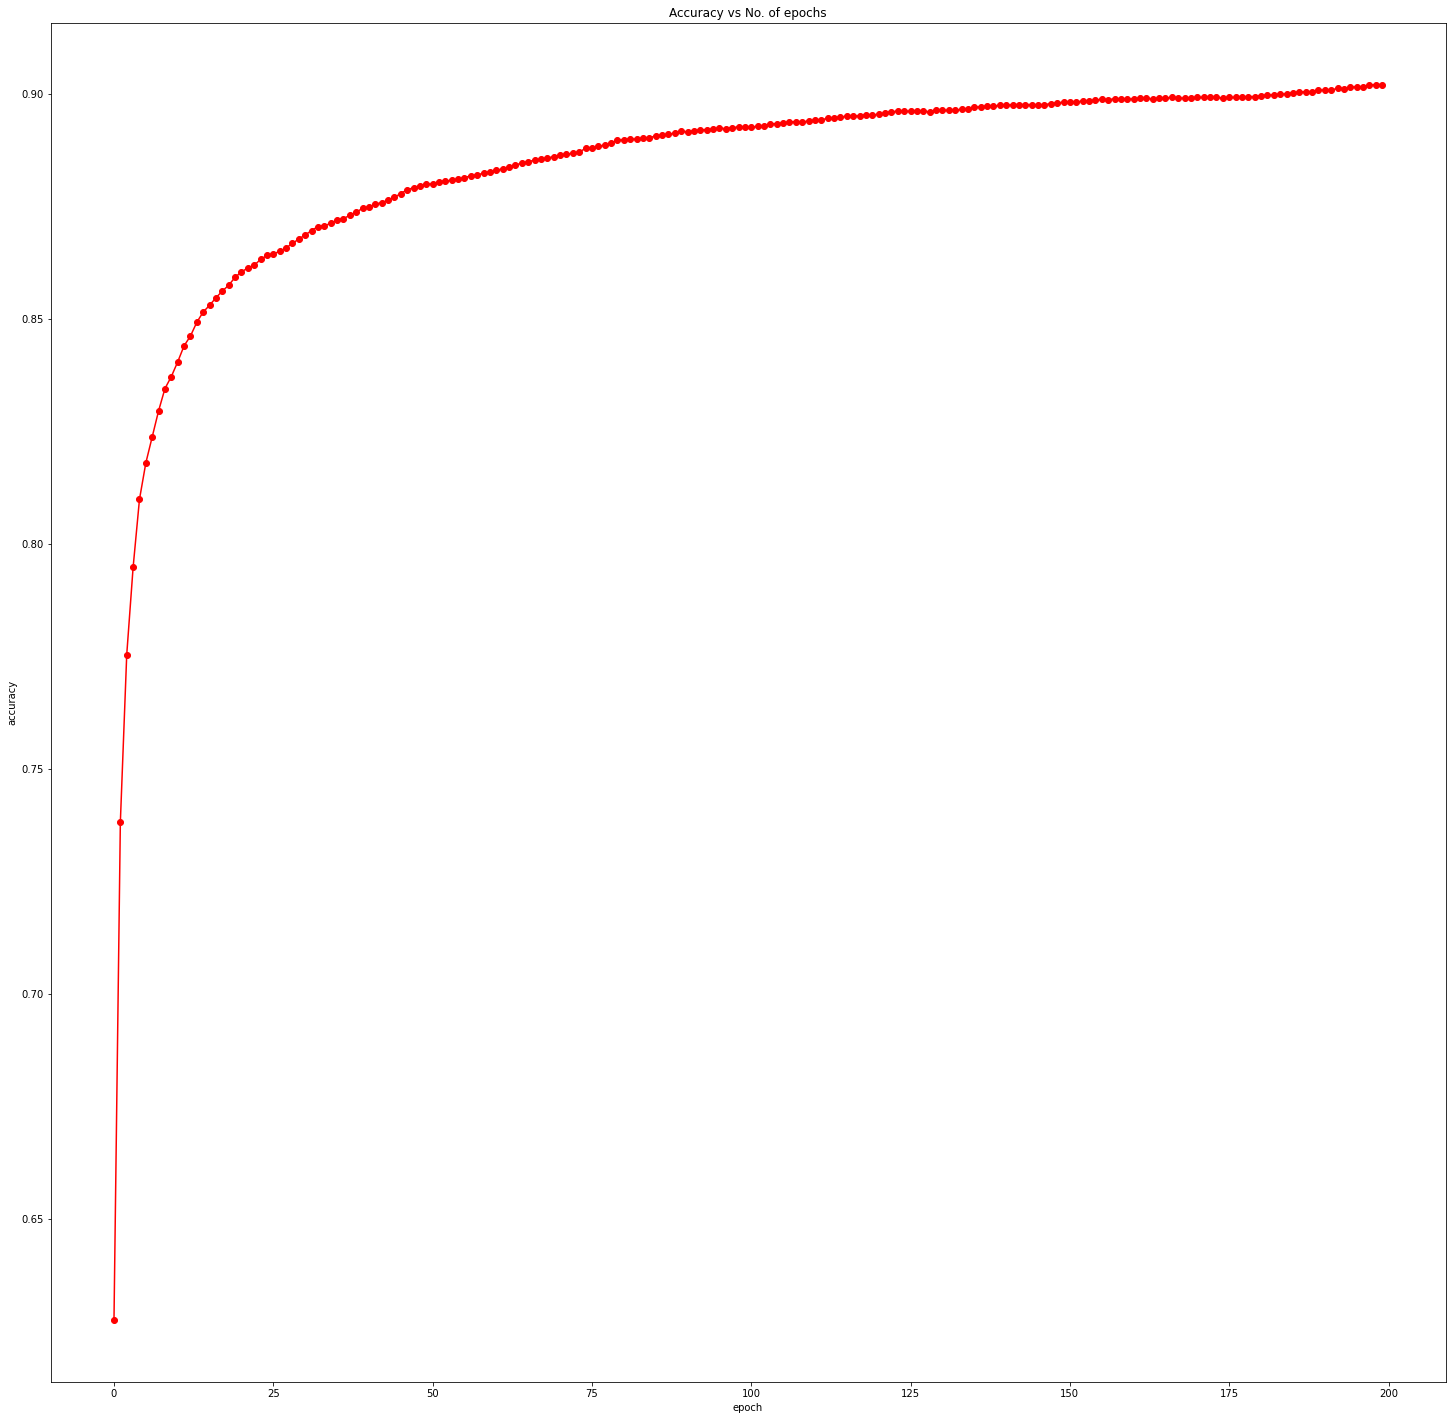

In [35]:
accuracies = [result['val_acc'] for result in history]
plt.figure(figsize=(25,25))
plt.plot(accuracies, '-ro')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs')
plt.savefig('accuracies.png', dpi=500, bbox_inches='tight')

In [20]:
torch.save(model.state_dict(), 'model/mnist-logistic-1.pth')

# Load

In [36]:
model2 = MNISTModel()

In [37]:
model2.load_state_dict(torch.load('model/mnist-logistic-1.pth'))

<All keys matched successfully>

In [38]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0083,  0.0033, -0.0113,  ..., -0.0116, -0.0127,  0.0071],
                      [ 0.0128,  0.0063,  0.0099,  ..., -0.0113,  0.0251,  0.0332],
                      [ 0.0251,  0.0275,  0.0069,  ...,  0.0059, -0.0188, -0.0246],
                      ...,
                      [-0.0159,  0.0134, -0.0293,  ...,  0.0157,  0.0112,  0.0036],
                      [ 0.0036, -0.0026, -0.0039,  ...,  0.0303, -0.0204,  0.0226],
                      [-0.0070, -0.0073, -0.0302,  ..., -0.0109, -0.0259, -0.0078]])),
             ('linear.bias',
              tensor([-0.1156,  0.2017, -0.0242, -0.1251,  0.0629,  0.3580, -0.0047,  0.2100,
                      -0.5098, -0.0780]))])

# Testing with Individual Images

In [39]:
test_dataset = MNIST(root='./data', train = False, transform = transforms.ToTensor())

Shape:  torch.Size([1, 28, 28])
Label:  7


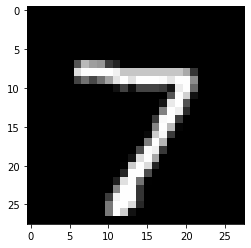

In [40]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape: ', img.shape)
print('Label: ', label)

In [41]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 Predicted: 7


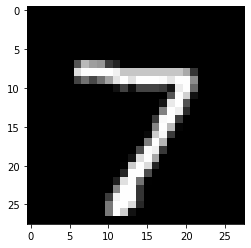

In [42]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_image(img, model))

# Done and Dusted